Image shape: (1365, 2048, 3)
Image shape: (1365, 2048)


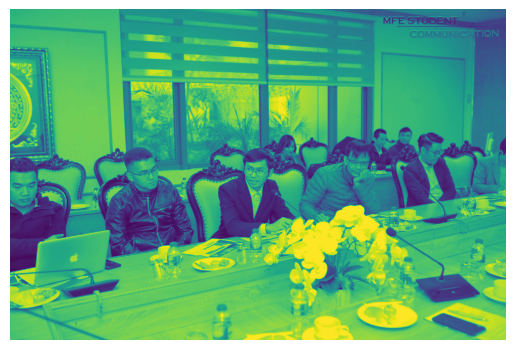

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import urllib.request
from io import BytesIO


url = str('https://imgur.com/nmGz7Lv.png')
with urllib.request.urlopen(url) as url:
    f = BytesIO(url.read())

X = np.array(Image.open(f))
print('Image shape: %s'%str(X.shape))

# Convert to gray

X = X.dot([0.299, 0.5870, 0.114])
print('Image shape: %s'%str(X.shape))
plt.imshow(X)
plt.axis('off')
plt.show()



In [7]:
# Horizontal filter
F1 = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

# Convolution 2 dimensions

def conv2d(X, F, s=1, p=0):
    """
    X: input matrix
    F: filter matrix
    s: Step size
    p: padding size
    """

    (w1, h1) = X.shape
    f = F.shape[0]
    w2 = int((w1 + 2*p -f)/s) + 1
    h2 = int((h1 + 2*p -f)/s) + 1

    Y = np.zeros((w2, h2))
    X_pad = np.pad(X, pad_width=p, mode='constant', constant_values = 0)
    
